<a href="https://colab.research.google.com/github/ganeshdasrla/odin_python/blob/main/EDA_Class_on_26th_May_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv("meanmedian.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Fare,Family,Survived
0,0,22.0,7.2500,1,0
1,1,38.0,71.2833,1,1
2,2,26.0,7.9250,0,1
3,3,35.0,53.1000,1,1
4,4,35.0,8.0500,0,0


In [4]:
df.isnull().sum()

Unnamed: 0      0
Age           177
Fare           45
Family          0
Survived        0
dtype: int64

<Axes: >

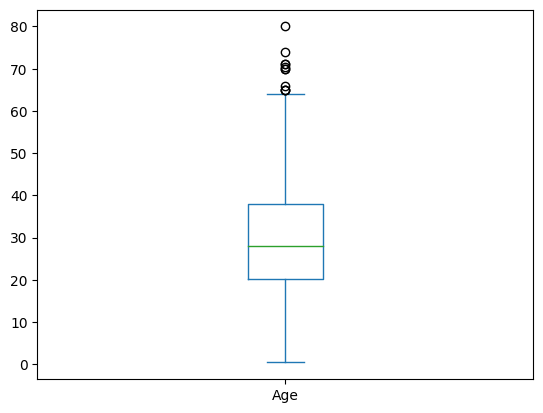

In [5]:
# Fill missing values
# mean, median - check outliers
df["Age"].plot(kind='box')

<Axes: >

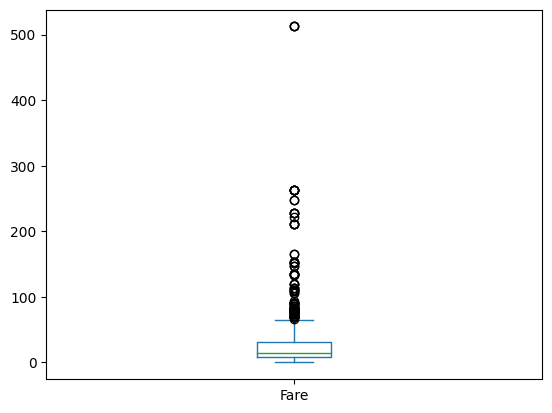

In [6]:
df["Fare"].plot(kind='box')

In [8]:
# Mean - age
# Median - Fare
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean")

In [10]:
df["Age"] = si.fit_transform(df[["Age"]])

In [11]:
df.isnull().sum()

Unnamed: 0     0
Age            0
Fare          45
Family         0
Survived       0
dtype: int64

In [14]:
# Fill Fare column with median
si.strategy = "median"
df["Fare"] = si.fit_transform(df[["Fare"]])

In [15]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Fare          0
Family        0
Survived      0
dtype: int64

In [63]:
# Mode Imputation techniques
mode_df = pd.read_csv('mode.csv')

In [64]:
mode_df.head()

,Unnamed: 0,FireplaceQu,GarageQual,SalePrice
0,0,NaN,TA,208500
1,1,TA,TA,181500
2,2,TA,TA,223500
3,3,Gd,TA,140000
4,4,TA,TA,250000


In [65]:
mode_df.isnull().sum()

Unnamed: 0       0
FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [66]:
# mode using fillna
# mode using simpleimputer
mode_df["FireplaceQu"].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [67]:
#fill missig values with 'GD'
mode_df["FireplaceQu"] = mode_df["FireplaceQu"].fillna(mode_df["FireplaceQu"].mode()[0])

In [68]:
mode_df.isnull().sum()

Unnamed: 0      0
FireplaceQu     0
GarageQual     81
SalePrice       0
dtype: int64

In [69]:
mode_df.head()

,Unnamed: 0,FireplaceQu,GarageQual,SalePrice
0,0,Gd,TA,208500
1,1,TA,TA,181500
2,2,TA,TA,223500
3,3,Gd,TA,140000
4,4,TA,TA,250000


In [ ]:
# Fill GarageQual with mode by using SimpleImputer
mode_df['GarageQual'] = mode_df['GarageQual'].astype(object)

# Replace None with np.nan using fillna
mode_df['GarageQual'] = mode_df['GarageQual'].fillna(np.nan)

# Initialize SimpleImputer with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
# Fit the imputer on the data
imputer.fit(mode_df[['GarageQual']])

# Transform the data
mode_df['GarageQual'] = imputer.transform(mode_df[['GarageQual']])

In [77]:
mode_df.isnull().sum()

Unnamed: 0      0
FireplaceQu     0
GarageQual     81
SalePrice       0
dtype: int64

In [76]:
mode_df.head()

,Unnamed: 0,FireplaceQu,GarageQual,SalePrice
0,0,Gd,TA,208500
1,1,TA,TA,181500
2,2,TA,TA,223500
3,3,Gd,TA,140000
4,4,TA,TA,250000


In [78]:
# copies of data frame
df_norm = df.copy()
df_std = df.copy()

In [79]:
df_std.head()

,Unnamed: 0,Age,Fare,Family,Survived
0,0,22.0,7.2500,1,0
1,1,38.0,71.2833,1,1
2,2,26.0,7.9250,0,1
3,3,35.0,53.1000,1,1
4,4,35.0,8.0500,0,0


In [80]:
stud_df = pd.read_csv('stud (1).csv')

In [81]:
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#numrical - hist, box, dist
#categorical - pie, bar
#numerical-numerical - scatter

In [87]:
stud_df.select_dtypes(exclude="object")

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


<Axes: xlabel='writing_score', ylabel='Count'>

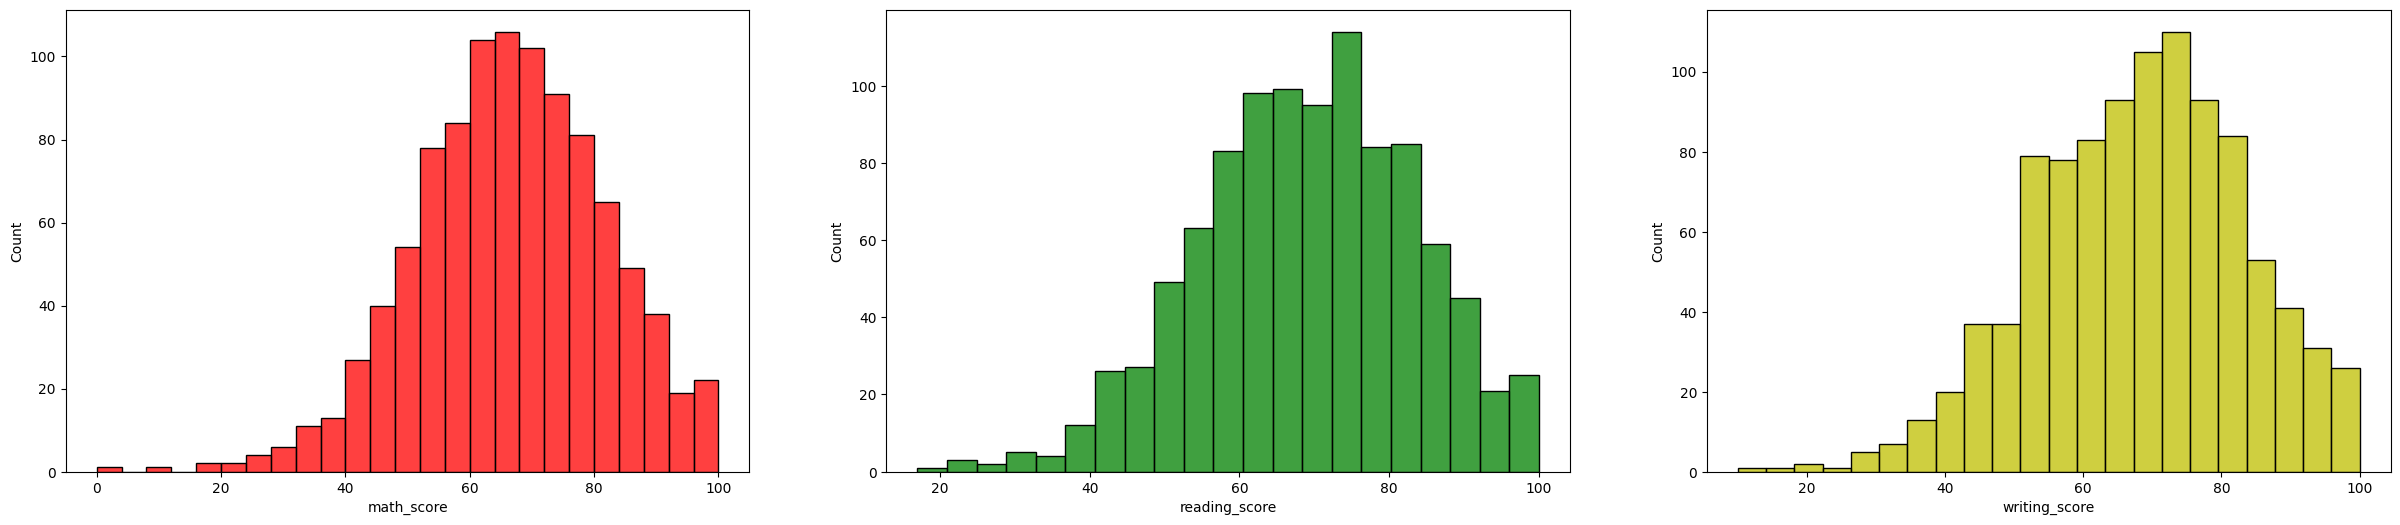

In [88]:
#check distribution of numrical columns
plt.figure(figsize=(30,6))
plt.subplot(1,3,1)
sns.histplot(stud_df["math_score"], color="r")
plt.subplot(1,3,2)
sns.histplot(stud_df["reading_score"], color="g")
plt.subplot(1,3,3)
sns.histplot(stud_df["writing_score"], color="y")

<Axes: ylabel='writing_score'>

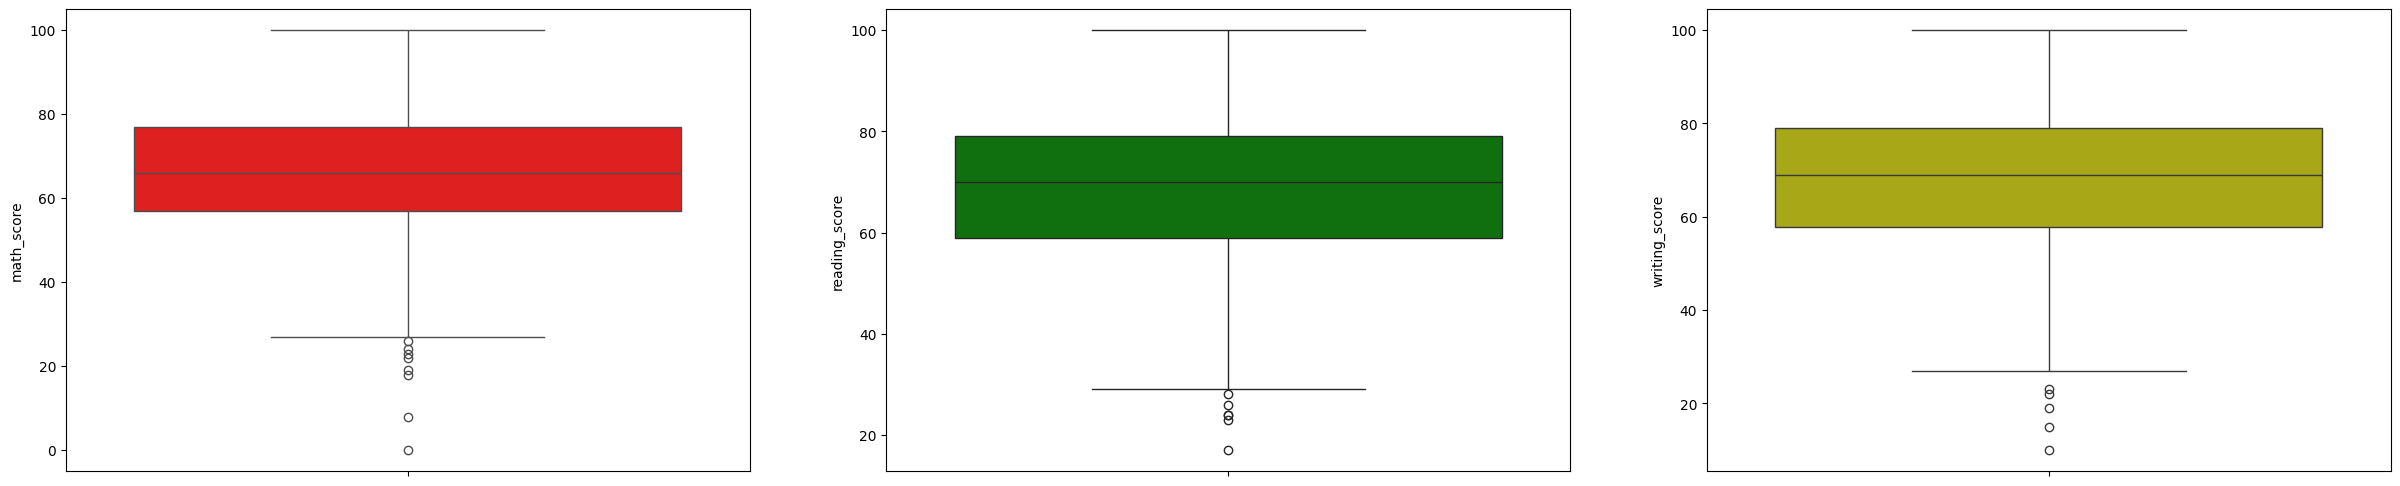

In [89]:
plt.figure(figsize=(30,6))
plt.subplot(1,3,1)
sns.boxplot(stud_df["math_score"], color="r")
plt.subplot(1,3,2)
sns.boxplot(stud_df["reading_score"], color="g")
plt.subplot(1,3,3)
sns.boxplot(stud_df["writing_score"], color="y")

In [90]:
cat_columns = stud_df.select_dtypes(include="object")

In [91]:
cat_columns.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

<Axes: ylabel='count'>

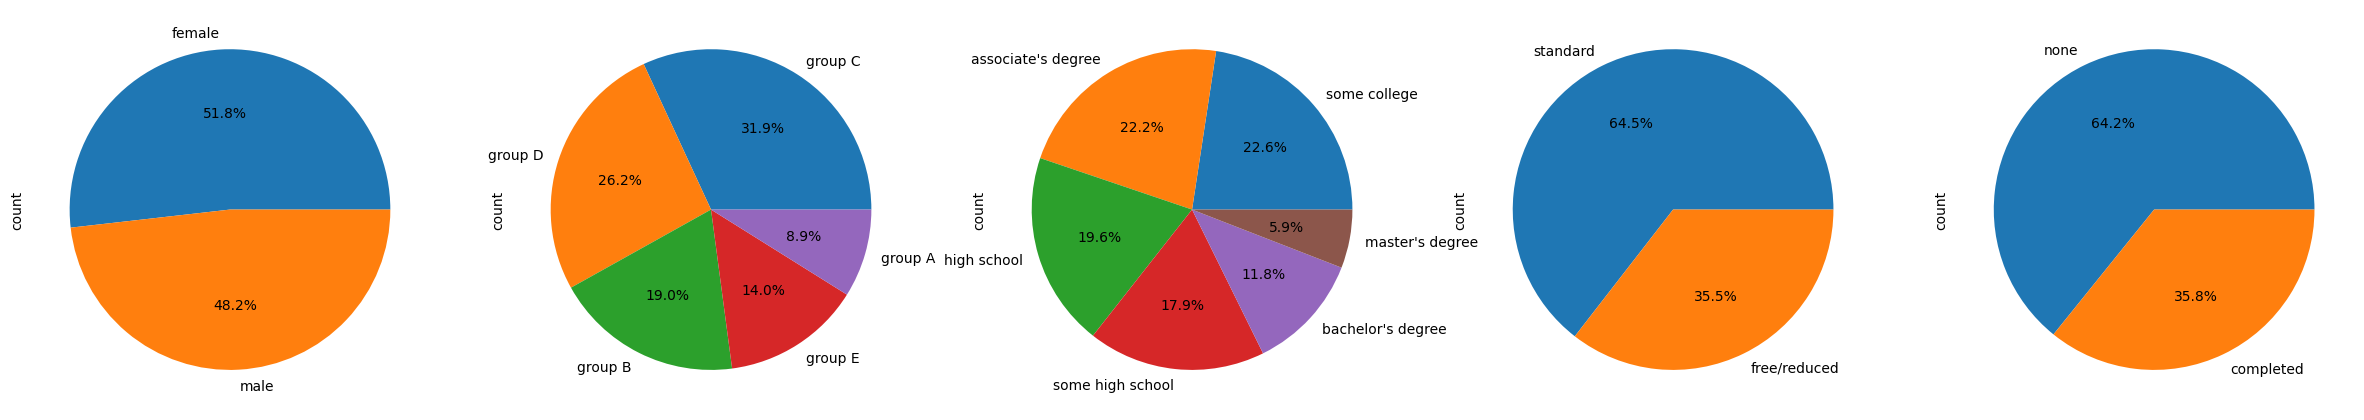

In [97]:
plt.figure(figsize=(30,6))
plt.subplot(1,5,1)
stud_df["gender"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.subplot(1,5,2)
stud_df["race_ethnicity"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.subplot(1,5,3)
stud_df["parental_level_of_education"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.subplot(1,5,4)
stud_df["lunch"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.subplot(1,5,5)
stud_df["test_preparation_course"].value_counts().plot(kind='pie', autopct="%1.1f%%")

<Axes: xlabel='test_preparation_course', ylabel='math_score'>

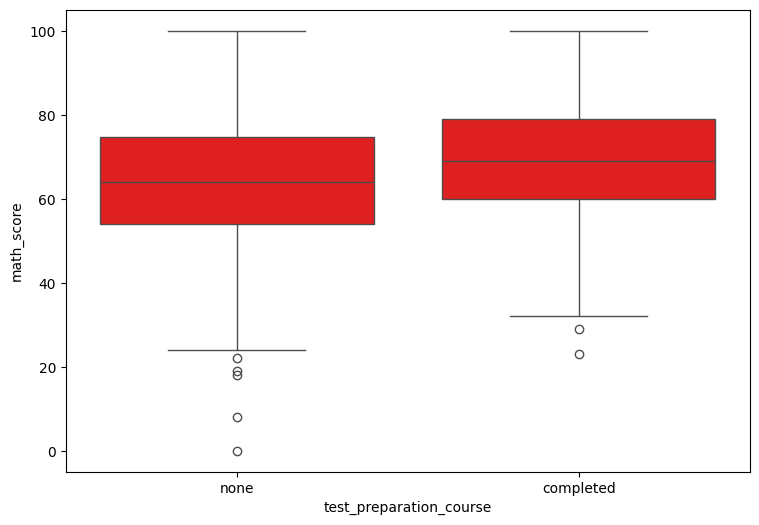

In [107]:
# catagorical and numerical - box, bar plot, violin
plt.figure(figsize=(30,6))
plt.subplot(1,3,1)
sns.boxplot(x=stud_df["test_preparation_course"], y=stud_df["math_score"], color="r")